In [21]:
from peopletsne import peopletsne
import pickle
from collections import defaultdict
from ipywidgets import fixed, interact, interact_manual, interactive
from bokeh.plotting import figure, output_notebook, output_file, show
import ipywidgets as widgets
from matplotlib import pyplot as plt
import PIL
from PIL import Image
import cv2

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
people = pickle.load(open('/in/detected.pickle','rb'))
#tasking = pickle.load(open('find_us.pickle','rb'))

#pretend you have ppl of interest
#DATASTORE = make_datastore(people,tasking)

#pretend you just have video processed
DATASTORE = peopletsne.make_datastore(people)
d = dict()
d['prep']=18
d['lr']=21

In [4]:
name2inds = defaultdict(set)

In [5]:
#plot dots
chain = peopletsne.interact(peopletsne.tsne_faces,
                            prep=widgets.IntSlider(min=1,max=100,step=1,value=6),
                            X=fixed(DATASTORE[0]),
                            COLOR=fixed(DATASTORE[1]),
                            lr=widgets.IntSlider(min=1,max=1000,step=1,value=70),
                            d=fixed(d),
                            thumbs=fixed(DATASTORE[5]));

In [6]:
reduceD = peopletsne.reduce_datastore(DATASTORE,inds,tsne_x,tsne_y)

selected: 76  items
inserted: 76  items


In [8]:
peopletsne.tsne_html(reduceD,d,100,False)

In [ ]:
peopletsne.relabel_found(DATASTORE,inds,name2inds,'bennings','fuchsia')

In [11]:
peopletsne.make_tasking('/in/2/*','/tasking.pickl')


In [13]:
tasking = pickle.load(open('/tasking.pickl','rb'))
tasking_key = list(tasking.keys())
tasking_key

[]

In [14]:
interact(peopletsne.showResults, 
         threshold=widgets.FloatSlider(min=0.00,max=1.0,step=0.01,value=0.42),
         key=tasking_key,
         tasking=fixed(tasking),people=fixed(people))

<function peopletsne.peopletsne.showResults>

In [ ]:
#write out the DATASTORE
DOUT = open('/in/DATASTORE.pickle','wb')
pickle.dump(DATASTORE,DOUT)
DOUT.close()


In [ ]:
#write out name2inds
N2I = open('/in/DATASTORE_N2I.pickle','wb')
pickle.dump(name2inds,N2I)
N2I.close()

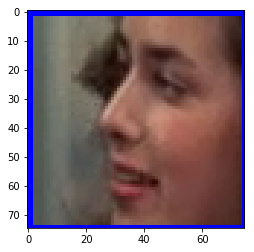

In [24]:
plt.imshow(PIL.Image.fromarray( cv2.cvtColor(people['29']['pic'], cv2.COLOR_BGR2RGB)))
plt.show()